## Random Walk

This notebook is for experimenting with random walks. Inspired by 'Module A: Brownian Motion on a Spreadsheet, a Tutorial' from Nassim Nicholas Taleb's book Dynamic Hedging: Managing Vanilla and Exotic Options.

Citation: Taleb, N.N. (1997). *Dynamic Hedging: Managing Vanilla and Exotic Options*, New York: John Wiley & Sons, Inc. 

In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt

### Single Asset Example

In [2]:
days = 248
t = 1/days
s = 100
vol = 0.157

random = np.random.normal(size=days)

prices = []

for i in range(len(random)):
    if i == 0:
        prices.append(s)
    else:
        price = prices[i-1]*np.exp(-.5*(vol**2)*t + vol*np.sqrt(t)*random[i])
        prices.append(price)

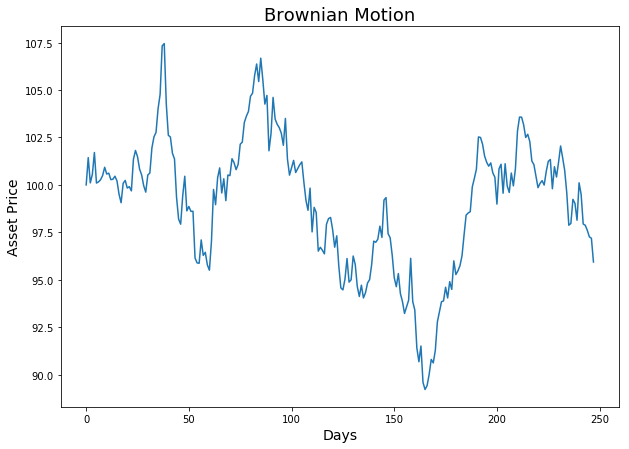

In [3]:
plt.figure(figsize=(10,7))

plt.plot(prices)
plt.title('Brownian Motion', fontsize=18)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Asset Price', fontsize=14);

In [4]:
df = pd.DataFrame({'Day':range(days),'Asset_Price':prices})

In [5]:
df['Returns'] = df['Asset_Price'].diff()

In [6]:
df['Direction'] = np.where(df['Returns'] > 0, 'Up', 'Down')

In [9]:
df.loc[0,'Direction'] = 0